In [3]:
import salem, datetime
import numpy as np
import matplotlib.pyplot as plt
# from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
#                  cartopy_xlim, cartopy_ylim,smooth2d,vinterp,g_times,ALL_TIMES)

from wrf import smooth2d
ncfiledir = "/home/durmaz/wrfout/wrfout_d01_2021-02-14.nc"
fnamedir = "/home/durmaz/Visulazation/wrf_out_process/shapefiles/gadm36_TUR_1.shp"
timeg=14


In [4]:
ds = salem.open_wrf_dataset(ncfiledir).isel(time=timeg)
timestart = ds.xtime
timestart = np.datetime_as_string(timestart.values)
timestart = datetime.datetime.strptime(str(timestart),'%Y-%m-%dT%H:%M:%S.%f000') - datetime.timedelta(hours=timeg)

timeout = ds.time
timeout = np.datetime_as_string(timeout.values)
timeout = datetime.datetime.strptime(str(timeout),'%Y-%m-%dT%H:%M:%S.%f000')

In [18]:
ds.TK

<xarray.DataArray 'TK' (bottom_top: 40, south_north: 179, west_east: 439)>
[3143240 values with dtype=float32]
Coordinates:
    lat          (south_north, west_east) float32 29.56 29.57 ... 41.64 41.61
    lon          (south_north, west_east) float32 13.83 13.92 ... 59.14 59.25
    xtime        datetime64[ns] 2021-02-14T14:00:00
    time         datetime64[ns] 2021-02-14T14:00:00
  * west_east    (west_east) float64 -1.579e+06 -1.57e+06 ... 2.363e+06
  * south_north  (south_north) float64 -7.906e+05 -7.816e+05 ... 8.114e+05
Dimensions without coordinates: bottom_top
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  Temperature
    units:        K
    stagger:      
    pyproj_srs:   +proj=lcc +lat_0=38.0000114440918 +lon_0=30 +lat_1=35 +lat_...

In [16]:
from netCDF4 import Dataset
from wrf import getvar,vinterp
ncfile = Dataset(str(ncfiledir))
fname = str(fnamedir)
ncfile.variables['P'][:]
#rh = getvar(ncfile, "rh",timeidx=timeg)

3, ...,
            2.92968750e-03,  1.17187500e-02, -4.88281250e-03],
          [ 1.66015625e-02, -4.63867188e-02,  1.31347656e-01, ...,
            6.91894531e-01,  8.47167969e-01,  4.39453125e-03],
          [-1.17187500e-02,  1.93359375e-01,  3.95996094e-01, ...,
            6.72363281e-01, -1.67968750e-01, -1.31835938e-02],
          ...,
          [ 4.88281250e-04, -6.87011719e-01, -7.71484375e-01, ...,
            2.26074219e-01,  2.11914062e-01,  2.44140625e-03],
          [ 2.92968750e-03, -3.67187500e-01, -5.17089844e-01, ...,
            1.94824219e-01,  1.77246094e-01,  7.81250000e-03],
          [ 4.88281250e-04, -4.88281250e-03, -6.34765625e-03, ...,
            7.32421875e-03,  1.17187500e-02, -5.37109375e-03]]],


        [[[ 1.81960938e+03,  1.81644531e+03,  1.82411719e+03, ...,
            1.52870312e+03,  1.52647656e+03,  1.52702344e+03],
          [ 1.81924219e+03,  1.82025781e+03,  1.83166406e+03, ...,
            1.56571875e+03,  1.57142969e+03,  1.53170312e+03],


In [3]:
# Vorticty 500 height mb
# from netCDF4 import Dataset
# from wrf import getvar,vinterp
# ncfile = Dataset(str(ncfiledir))
# vor = getvar(ncfile,"avo",timeidx=timeg)
# ht500 = ds.salem.wrf_plevel('Z', levels=500)
# vor500=vinterp(ncfile,
#             field=vor,
#             vert_coord="p",
#             interp_levels=[500],
#             extrapolate=True,
#             log_p=True)
# smooth_ht500 = smooth2d(ht500, 2, cenweight=4)

# fig, ax = plt.subplots(figsize=(10,6))
# # Read shape file
# shapetr = salem.read_shapefile(fnamedir,cached=True)

# # plot the salem map background, make countries in grey
# smap = ds.salem.get_map(countries=False)
# smap.set_shapefile(countries=True, color='black')
# smap.set_lonlat_contours(interval=0)
# # Add shapefile
# #smap.set_shapefile(shapetr)
# smap.plot(ax=ax)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)

# xx, yy = smap.grid.transform(ht500.west_east.values, ht500.south_north.values,
#                              crs=ht500.salem.grid.proj)
# contours = ax.contour(xx, yy, smooth_ht500/10, colors="dimgray", linewidths=1,levels=np.arange(476,604,4))
# ax.clabel(contours, inline=1, fontsize=10, fmt="%i",colors="white")

# levels = np.arange(-12,13,2)
# vor500contour= ax.contourf(xx, yy, vor500[0],extend="both",cmap="coolwarm",
#                 levels=levels)
# cbar= fig.colorbar(vor500contour,fraction=0.071,orientation="horizontal",pad=.07,aspect=50)
# cbar.set_label("500 hPa Vortisiti (10-5 s-1)",labelpad=-40)
# plt.title("500 hPa Vortisiti (10-5 s-1) \n500 hPa Jeopotansiyel Yüksekliği (dam)",loc="left",pad=10,fontsize=12)
# plt.title("Başlangıç: {} UTC\nGeçerli: {} UTC".format(timestart,timeout),loc="right",pad=10,fontsize=10)
# plt.savefig('vor_500h_{}.png'.format(timeout),dpi=300,transparent=False)

In [4]:
# Temperature at 2m and wind
# t2c = ds.T2C
# u10 = ds.U10 
# v10 = ds.V10 
# # Bunu subplots ne öğren ?
# fig, ax = plt.subplots(figsize=(10,6),dpi=300)
# # Read shape file
# shapetr = salem.read_shapefile(fnamedir,cached=True)

# # plot the salem map background, make countries in grey
# smap = ds.salem.get_map(countries=False)
# smap.set_shapefile(countries=True, color='black')
# smap.set_lonlat_contours(interval=0)
# # Add shapefile
# #smap.set_shapefile(shapetr)
# smap.plot(ax=ax)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)

# logo=plt.imread("logo.png")
# plt.figimage(logo, 380, 400,alpha=0.7)

# xx, yy = smap.grid.transform(t2c.west_east.values, t2c.south_north.values,
#                              crs=t2c.salem.grid.proj)
# levels = np.arange(-30,44,2)
# t2mcontour= ax.contourf(xx, yy, t2c, extend="both",cmap="jet",
#                 levels=levels)

# cbar= fig.colorbar(t2mcontour,fraction=0.071,orientation="horizontal",pad=.07,aspect=50)
# cbar.set_label("2 metre Sıcaklığı (°C) ",labelpad=-40)
# ax.barbs(xx[::12], yy[::12],
#             u10[::12, ::12], v10[::12, ::12],
#              length=5)
# plt.title("2 metre Sıcaklığı (°C)\n10 metre rüzgar (kt)",loc="left",pad=10,fontsize=12)
# plt.title("Başlangıç: {} UTC\nGeçerli: {} UTC".format(timestart,timeout),loc="right",pad=10,fontsize=10)
# #fig.savefig('wind_t2_{}.png'.format(timeout),dpi=300,transparent=False)   

In [5]:
# deniz seviyesi basıncı ve ht500
# slp = ds.SLP
# ht500 = ds.salem.wrf_plevel('Z', 500)
# smooth_slp = smooth2d(slp,100, cenweight=4)

# # Bunu subplots ne öğren ?
# fig, ax = plt.subplots(figsize=(10,6))


# shapetr = salem.read_shapefile(fnamedir)
# # plot the salem map background, make countries in grey
# smap = ds.salem.get_map(countries=False)
# smap.set_shapefile(countries=True, color='grey')
# smap.set_lonlat_contours(interval=0)
# # Add shapefile
# # smap.set_shapefile(shapetr)
# smap.plot(ax=ax)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)


# logo=plt.imread("/home/durmaz/Visulazation/wrf_out_process/logo.png")
# fig.figimage(logo,380,420,alpha=0.7)

# xx, yy = smap.grid.transform(slp.west_east.values, slp.south_north.values,
#                              crs=slp.salem.grid.proj)
# levels = np.arange(950,6040,40)
# contours = ax.contour(xx, yy, smooth_slp,colors="black",linewidths=1,levels=np.arange(950,1100,2))
# ax.clabel(contours, inline=1, fontsize=7, fmt=lambda p: f'{str(int(p))[-2:]}')

# levels = np.arange(476,604,4)
# ht500contour= ax.contourf(xx, yy,ht500/10,extend="both",cmap="rainbow",levels=levels)
# cbar= fig.colorbar(ht500contour,fraction=0.071,orientation="horizontal",pad=.07,aspect=50)
# cbar.set_label("500 hPa Jeopotansiyel Yükseklik (dam)",labelpad=-40)

# plt.title("500 hPa Jeopotansiyel Yüksekliği (m)\nDeniz Seviyesi Basıncı (mb)",loc="left",pad=10,fontsize=12)
# plt.title(f'Başlangıç: {timestart} UTC \nGeçerli: {timeout} UTC',loc="right",pad=10,fontsize=10)

# fig.savefig('slp_500h_{}.png'.format(timeout),dpi=300,transparent=False)               

In [6]:
# Temperature at 2m and wind slp
# t2c = ds.T2C
# u10 = ds.U10 
# v10 = ds.V10
# slp = ds.SLP
# smooth_slp = smooth2d(slp, 100, cenweight=4)
# # Bunu subplots ne öğren ?
# fig, ax = plt.subplots(figsize=(10,6))
# # Read shape file
# shapetr = salem.read_shapefile(fnamedir,cached=True)

# # plot the salem map background, make countries in grey
# smap = ds.salem.get_map(countries=False)
# smap.set_shapefile(countries=True, color='grey')
# smap.set_lonlat_contours(interval=0)
# # Add shapefile
# #smap.set_shapefile(shapetr)
# smap.plot(ax=ax)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)


# xx, yy = smap.grid.transform(t2c.west_east.values, t2c.south_north.values,
#                              crs=t2c.salem.grid.proj)

# levels = np.arange(950,1100,2)
# slpcontours = ax.contour(xx,yy,smooth_slp,
#                             colors="maroon",linewidths=1,levels=levels)
# ax.clabel(slpcontours, inline=1, fontsize=10, fmt=lambda p: f'{str(int(p))[-2:]}',colors="maroon")
# levels = np.arange(-30,44,2)
# t2mcontour= ax.contourf(xx, yy, t2c, extend="both",cmap="jet",
#                 levels=levels)

# cbar= fig.colorbar(t2mcontour,fraction=0.071,orientation="horizontal",pad=.07,aspect=50)
# cbar.set_label("2 metre Sıcaklığı (°C) ",labelpad=-40)
# ax.barbs(xx[::12], yy[::12],
#             u10[::12, ::12], v10[::12, ::12],
#              length=5)

# plt.title("Deniz Seviyesi Basıncı (hPa)\n2 metre Sıcaklığı (°C)\n10 metre rüzgar (kt)",loc="left",pad=10,fontsize=12)
# plt.title("Başlangıç: {} UTC\nGeçerli: {} UTC".format(timestart,timeout),loc="right",pad=10,fontsize=10)

#fig.savefig('slp_wind_t2_{}.png'.format(timeout),dpi=300,transparent=False)      

Text(1.0, 1.0, 'Başlangıç: 2021-02-14 00:00:00 UTC\nGeçerli: 2021-02-14 13:00:00 UTC')

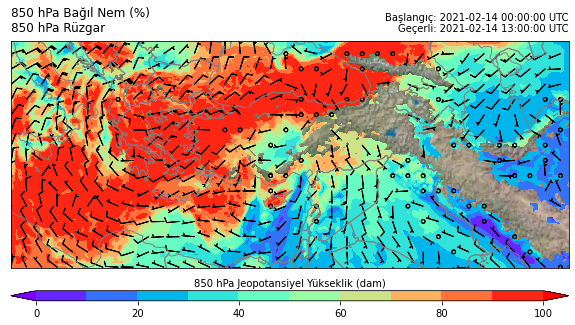

In [43]:
# 850 Ruzgar ve RH

# from netCDF4 import Dataset
# from wrf import getvar,vinterp
# ncfile = Dataset(str(ncfiledir))
# fname = str(fnamedir)

# rh = getvar(ncfile, "rh",timeidx=timeg)
# u = ds.salem.wrf_plevel('U', 850)
# v = ds.salem.wrf_plevel('V', 850)


# rh850=vinterp(ncfile,
#             field=rh,
#             vert_coord="p",
#             interp_levels=[850],
#             extrapolate=True,
#             field_type="z",
#             log_p=True)



# fig, ax = plt.subplots(figsize=(10,6))


# #shapetr = salem.read_shapefile(fnamedir)
# # plot the salem map background, make countries in grey
# smap = ds.salem.get_map(countries=False)
# smap.set_shapefile(countries=True, color='grey')
# smap.set_lonlat_contours(interval=0)
# smap.set_rgb(natural_earth='lr')

# # Add shapefile
# # smap.set_shapefile(shapetr)
# smap.plot(ax=ax)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)

# logo=plt.imread("/home/durmaz/Visulazation/wrf_out_process/logo.png")
# fig.figimage(logo,380,420,alpha=0.7)

# xx, yy = smap.grid.transform(u.west_east.values, u.south_north.values,
#                                 crs=u.salem.grid.proj)
# levels = np.arange(476,604,4)
# rh850contour= ax.contourf(xx, yy,np.ma.masked_greater((rh850[0]),100), extend="both",cmap="rainbow",levels=np.arange(0,110,10))
# cbar= fig.colorbar(rh850contour,fraction=0.071,orientation="horizontal",pad=.07,aspect=50)
# cbar.set_label("850 hPa Jeopotansiyel Yükseklik (dam)",labelpad=-40)

# ax.barbs(xx[::12], yy[::12],
#             u[::12, ::12], v[::12, ::12],
#              length=5)

# plt.title("850 hPa Bağıl Nem (%)\n850 hPa Rüzgar",loc="left",pad=10,fontsize=12)
# plt.title("Başlangıç: {} UTC\nGeçerli: {} UTC".format(timestart,timeout),loc="right",pad=10,fontsize=10)
# plt.savefig('slp_500h_{}.png'.format(time),dpi=300,transparent=False)